In [1]:
# 필요한 라이브러리 임포트
import numpy as np  # numpy 추가
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
import moabb
from moabb.datasets import Cho2017
from moabb.paradigms import LeftRightImagery

# MOABB 로그 레벨 설정
moabb.set_log_level("info")

# Cho2017 데이터셋 로드 및 Paradigm 설정
dataset = Cho2017()  # Cho2017 데이터셋 사용
paradigm = LeftRightImagery(resample=128)  # 샘플링 속도를 128Hz로 설정

# 데이터 로드 (특정 Subject 선택)
X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[1])  # Subject 1의 데이터를 사용
print("데이터 형태:", X.shape)
print("레이블 형태:", y.shape)
print("메타데이터 샘플:", metadata.head())

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CSP + LDA 파이프라인 구성
csp = CSP(n_components=8, reg=None, log=True)  # CSP 구성 (8개의 컴포넌트 사용)
lda = LDA()  # LDA 구성
pipeline = make_pipeline(csp, lda)  # CSP와 LDA를 파이프라인으로 결합

# 교차 검증 수행 (5-Fold)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("교차 검증 정확도 (5-Fold):", scores)
print("평균 교차 검증 정확도:", scores.mean())

# 모델 학습 및 테스트
pipeline.fit(X_train, y_train)  # 학습
test_score = pipeline.score(X_test, y_test)  # 테스트 데이터 평가
print("테스트 정확도:", test_score)

# --- 추가: 시각화를 위한 데이터 변환 ---
# CSP 변환 후 데이터 추출
X_csp = csp.fit_transform(X_train, y_train)  # CSP 변환 수행
X_test_csp = csp.transform(X_test)          # 테스트 데이터 변환

# LDA를 통한 분류
lda.fit(X_csp, y_train)             # LDA 학습
X_lda = lda.transform(X_csp)        # LDA 변환
X_test_lda = lda.transform(X_test_csp)

# --- 시각화 ---
# 2D 시각화 (첫 번째 2개의 LDA 축)
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']  # 클래스별 색상
labels = np.unique(y_train)  # 고유 클래스

# 학습 데이터 시각화
for i, label in enumerate(labels):
    plt.scatter(X_lda[y_train == label, 0], X_lda[y_train == label, 1],
                color=colors[i], label=f'Class {label} (Train)', alpha=0.7)

# 테스트 데이터 시각화
for i, label in enumerate(labels):
    plt.scatter(X_test_lda[y_test == label, 0], X_test_lda[y_test == label, 1],
                color=colors[i], marker='x', label=f'Class {label} (Test)', alpha=0.7)

# 그래프 설정
plt.title('CSP + LDA Classification Visualization')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.grid(True)
plt.show()

2025-02-07 16:56:58,894 WARNING MainThread moabb.datasets.gigadb Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 200 events (all good), 0 – 3 s (baseline off), ~150.2 MiB, data loaded,
 'left_hand': 100
 'right_hand': 100>
  warn(f"warnEpochs {epochs}")
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


데이터 형태: (200, 64, 384)
레이블 형태: (200,)
메타데이터 샘플:    subject session run
0        1       0   0
1        1       0   0
2        1       0   0
3        1       0   0
4        1       0   0
교차 검증 정확도 (5-Fold): [0.8125  0.5625  0.8125  0.65625 0.78125]
평균 교차 검증 정확도: 0.725
테스트 정확도: 0.75


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1000x600 with 0 Axes>

In [2]:
print("X_lda shape:", X_lda.shape)
print("X_test_lda shape:", X_test_lda.shape)

X_lda shape: (160, 1)
X_test_lda shape: (40, 1)


In [3]:
lda = LDA(n_components=2)  # LDA 축을 2개로 제한

In [4]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import moabb
from moabb.datasets import Cho2017
from moabb.paradigms import LeftRightImagery

# MOABB 로그 레벨 설정
moabb.set_log_level("info")

# Cho2017 데이터셋 로드
dataset = Cho2017()
paradigm = LeftRightImagery(resample=128)

X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[1])
print("데이터 형태:", X.shape)
print("레이블 형태:", y.shape)
print("메타데이터 샘플:", metadata.head())

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CSP + LDA 파이프라인
csp = CSP(n_components=8, reg=None, log=True)
lda = LDA(n_components=2)  # LDA 축을 2개로 제한
pipeline = make_pipeline(csp, lda)

# 교차 검증
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("교차 검증 정확도 (5-Fold):", scores)
print("평균 교차 검증 정확도:", scores.mean())

# 모델 학습 및 테스트
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print("테스트 정확도:", test_score)

# --- 시각화를 위한 데이터 변환 ---
X_csp = csp.fit_transform(X_train, y_train)
X_test_csp = csp.transform(X_test)
X_lda = lda.fit_transform(X_csp, y_train)
X_test_lda = lda.transform(X_test_csp)

# --- 시각화 ---
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']
labels = np.unique(y_train)

for i, label in enumerate(labels):
    plt.scatter(X_lda[y_train == label, 0], X_lda[y_train == label, 1], 
                color=colors[i], label=f'Class {label} (Train)', alpha=0.7)

for i, label in enumerate(labels):
    plt.scatter(X_test_lda[y_test == label, 0], X_test_lda[y_test == label, 1], 
                color=colors[i], marker='x', label=f'Class {label} (Test)', alpha=0.7)

plt.title('CSP + LDA Classification Visualization')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.grid(True)
plt.show()

2025-02-07 16:57:42,258 WARNING MainThread moabb.datasets.gigadb Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 200 events (all good), 0 – 3 s (baseline off), ~150.2 MiB, data loaded,
 'left_hand': 100
 'right_hand': 100>
  warn(f"warnEpochs {epochs}")
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


데이터 형태: (200, 64, 384)
레이블 형태: (200,)
메타데이터 샘플:    subject session run
0        1       0   0
1        1       0   0
2        1       0   0
3        1       0   0
4        1       0   0


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 693, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).


In [5]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import moabb
from moabb.datasets import Cho2017
from moabb.paradigms import LeftRightImagery

# MOABB 로그 레벨 설정
moabb.set_log_level("info")

# Cho2017 데이터셋 로드
dataset = Cho2017()
paradigm = LeftRightImagery(resample=128)

# 첫 번째 피실험자 데이터 로드
X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[1])
print("데이터 형태:", X.shape)
print("레이블 형태:", y.shape)
print("메타데이터 샘플:\n", metadata.head())

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CSP + LDA 파이프라인
csp = CSP(n_components=8, reg=None, log=True)  # CSP로 8개 컴포넌트 추출
lda = LDA()  # n_components는 자동으로 설정 (클래스 수에 따라)
pipeline = make_pipeline(csp, lda)

# 교차 검증 수행 (5-Fold)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("\n교차 검증 정확도 (5-Fold):", scores)
print("평균 교차 검증 정확도:", scores.mean())

# 모델 학습 및 테스트
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print("\n테스트 정확도:", test_score)

# --- 시각화를 위한 데이터 변환 ---
X_csp = csp.fit_transform(X_train, y_train)  # 학습 데이터에 CSP 변환
X_test_csp = csp.transform(X_test)          # 테스트 데이터에 CSP 변환
X_lda = lda.fit_transform(X_csp, y_train)   # LDA로 학습 데이터 변환
X_test_lda = lda.transform(X_test_csp)      # LDA로 테스트 데이터 변환

# --- 시각화 ---
plt.figure(figsize=(12, 8))
colors = ['red', 'blue']  # 클래스별 색상
markers = ['o', 'x']  # 학습/테스트 데이터 마커
labels = np.unique(y_train)  # 클래스 레이블

# 학습 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_train == label)  # 특정 클래스 인덱스 필터링
    plt.scatter(X_lda[indices, 0], X_lda[indices, 1], 
                color=colors[i], label=f'Class {label} (Train)', alpha=0.7, marker=markers[0])

# 테스트 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_test == label)  # 특정 클래스 인덱스 필터링
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 1], 
                color=colors[i], label=f'Class {label} (Test)', alpha=0.7, marker=markers[1])

# 그래프 설정
plt.title('CSP + LDA Classification Visualization', fontsize=16)
plt.xlabel('LDA Component 1', fontsize=12)
plt.ylabel('LDA Component 2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

2025-02-07 17:03:40,754 WARNING MainThread moabb.datasets.gigadb Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 200 events (all good), 0 – 3 s (baseline off), ~150.2 MiB, data loaded,
 'left_hand': 100
 'right_hand': 100>
  warn(f"warnEpochs {epochs}")
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


데이터 형태: (200, 64, 384)
레이블 형태: (200,)
메타데이터 샘플:
    subject session run
0        1       0   0
1        1       0   0
2        1       0   0
3        1       0   0
4        1       0   0

교차 검증 정확도 (5-Fold): [0.8125  0.5625  0.8125  0.65625 0.78125]
평균 교차 검증 정확도: 0.725

테스트 정확도: 0.75


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1200x800 with 0 Axes>

In [6]:
print("X_lda shape:", X_lda.shape)
print("X_test_lda shape:", X_test_lda.shape)

X_lda shape: (160, 1)
X_test_lda shape: (40, 1)


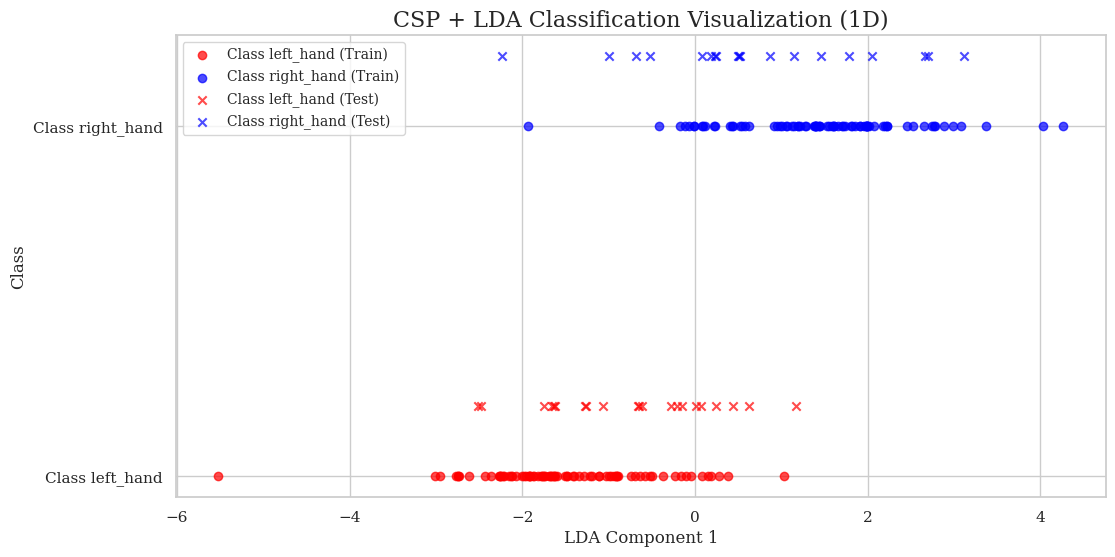

In [7]:
# --- 수정된 시각화 코드 ---
plt.figure(figsize=(12, 6))
colors = ['red', 'blue']
markers = ['o', 'x']
labels = np.unique(y_train)

# 학습 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_train == label)
    plt.scatter(X_lda[indices], [i] * len(indices[0]), 
                color=colors[i], label=f'Class {label} (Train)', alpha=0.7, marker=markers[0])

# 테스트 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_test == label)
    plt.scatter(X_test_lda[indices], [i + 0.2] * len(indices[0]), 
                color=colors[i], label=f'Class {label} (Test)', alpha=0.7, marker=markers[1])

# 그래프 설정
plt.title('CSP + LDA Classification Visualization (1D)', fontsize=16)
plt.xlabel('LDA Component 1', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.yticks(range(len(labels)), [f'Class {label}' for label in labels])
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

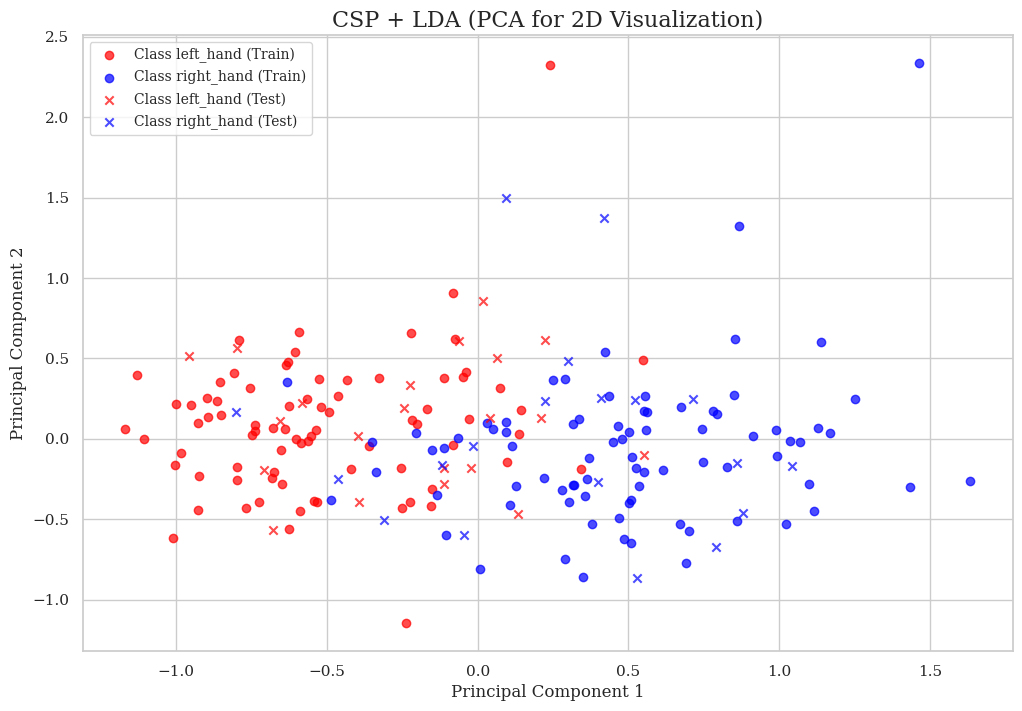

In [8]:
from sklearn.decomposition import PCA

# --- PCA로 LDA 출력 차원을 확장 ---
pca = PCA(n_components=2)  # PCA를 사용해 2D로 변환
X_lda_2d = pca.fit_transform(X_csp)  # CSP 변환된 데이터를 PCA로 2D로 변환
X_test_lda_2d = pca.transform(X_test_csp)

# --- 2D 시각화 ---
plt.figure(figsize=(12, 8))
colors = ['red', 'blue']
markers = ['o', 'x']
labels = np.unique(y_train)

# 학습 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_train == label)
    plt.scatter(X_lda_2d[indices, 0], X_lda_2d[indices, 1], 
                color=colors[i], label=f'Class {label} (Train)', alpha=0.7, marker=markers[0])

# 테스트 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_test == label)
    plt.scatter(X_test_lda_2d[indices, 0], X_test_lda_2d[indices, 1], 
                color=colors[i], label=f'Class {label} (Test)', alpha=0.7, marker=markers[1])

# 그래프 설정
plt.title('CSP + LDA (PCA for 2D Visualization)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

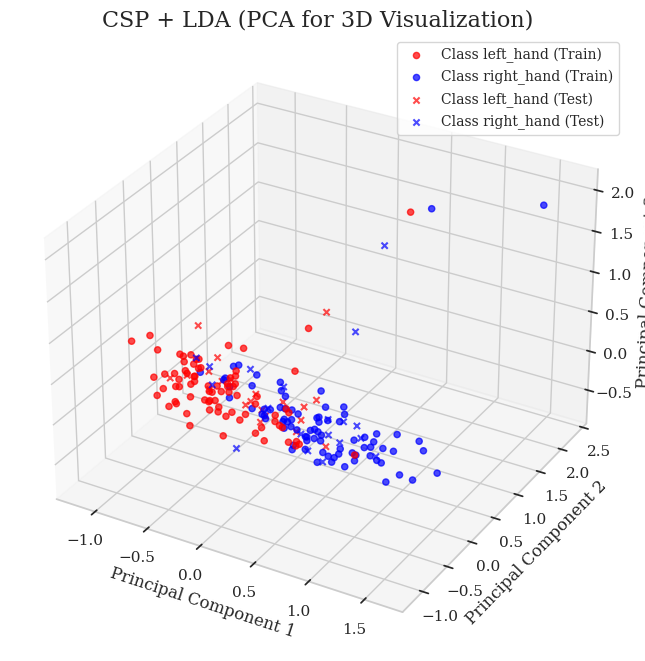

In [9]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# --- PCA로 3D 변환 ---
pca = PCA(n_components=3)  # PCA로 3차원으로 변환
X_lda_3d = pca.fit_transform(X_csp)  # 학습 데이터 변환
X_test_lda_3d = pca.transform(X_test_csp)  # 테스트 데이터 변환

# --- 3D 시각화 ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue']
markers = ['o', 'x']
labels = np.unique(y_train)

# 학습 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_train == label)
    ax.scatter(X_lda_3d[indices, 0], X_lda_3d[indices, 1], X_lda_3d[indices, 2],
               color=colors[i], label=f'Class {label} (Train)', alpha=0.7, marker=markers[0])

# 테스트 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_test == label)
    ax.scatter(X_test_lda_3d[indices, 0], X_test_lda_3d[indices, 1], X_test_lda_3d[indices, 2],
               color=colors[i], label=f'Class {label} (Test)', alpha=0.7, marker=markers[1])

# 그래프 설정
ax.set_title('CSP + LDA (PCA for 3D Visualization)', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.legend(fontsize=10)
plt.show()

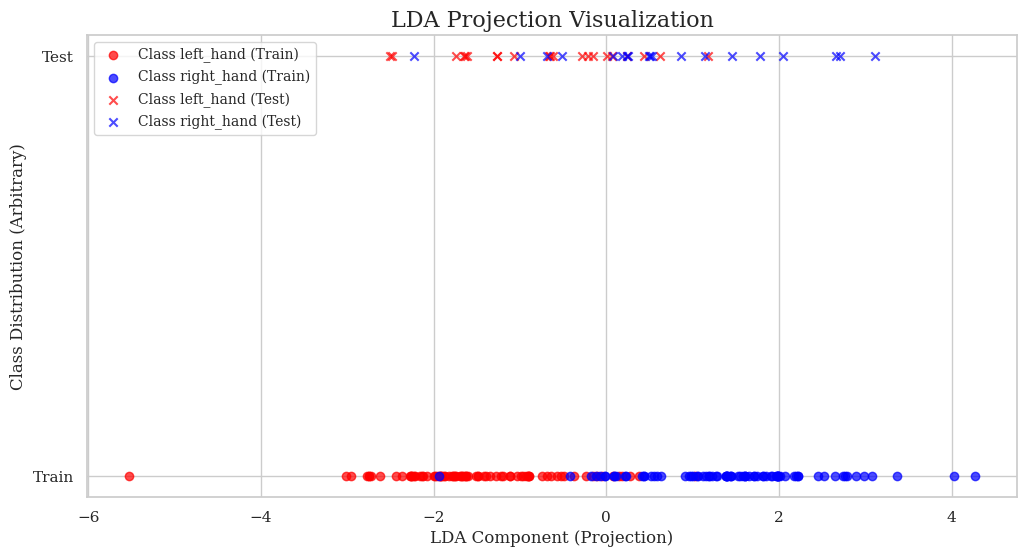

In [10]:
# LDA 변환
X_lda = lda.fit_transform(X_csp, y_train)  # LDA로 CSP 데이터 변환
X_test_lda = lda.transform(X_test_csp)    # 테스트 데이터 변환

# --- 시각화 ---
plt.figure(figsize=(12, 6))
colors = ['red', 'blue']  # 클래스별 색상
labels = np.unique(y_train)  # 고유 클래스

# 학습 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_train == label)
    plt.scatter(X_lda[indices], [0] * len(indices[0]), 
                color=colors[i], label=f'Class {label} (Train)', alpha=0.7, marker='o')

# 테스트 데이터 시각화
for i, label in enumerate(labels):
    indices = np.where(y_test == label)
    plt.scatter(X_test_lda[indices], [0.2] * len(indices[0]), 
                color=colors[i], label=f'Class {label} (Test)', alpha=0.7, marker='x')

# 그래프 설정
plt.title('LDA Projection Visualization', fontsize=16)
plt.xlabel('LDA Component (Projection)', fontsize=12)
plt.ylabel('Class Distribution (Arbitrary)', fontsize=12)
plt.yticks([0, 0.2], ['Train', 'Test'])
plt.legend(fontsize=10)
plt.grid(True)
plt.show()